## Homelessness data

This [dataset](https://www.huduser.gov/portal/datasets/hpmd.html) seems promising. There's a [paper](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) too.

This [article](https://www.bryanshalloway.com/2021/01/11/basics-of-data-sources-on-homelessness/#hmis-data) talks about some potential open-use HMIS data (which would be amazing).

Checklist: https://github.com/BrownDSI/DATA1030-Fall2023/blob/main/week6%20-%20supervised%20ML%20algos/linreg_logreg.ipynb

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv("data/05b_analysis_file_update.csv")
print(df.shape)
df

(3008, 332)


,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,2013,WY-500,501.0,452.0,953.0,306.0,371.0,677.0,195.0,81.0,...,0,0,0,0,0,0,1,0,0,1
3004,2014,WY-500,563.0,194.0,757.0,327.0,136.0,463.0,236.0,58.0,...,1,1,1,3,1,0,1,0,0,1
3005,2015,WY-500,507.0,291.0,798.0,292.0,208.0,500.0,215.0,83.0,...,0,0,0,0,0,0,1,0,0,1
3006,2016,WY-500,491.0,366.0,857.0,277.0,240.0,517.0,214.0,126.0,...,1,1,1,3,1,0,1,0,0,1


In [498]:
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr.to_string())
# print('data types of the features with missing values:')
# # print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes.to_string())
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)
print('# of features with missing values:', sum(perc_missing_per_ftr > 0))

fraction of missing values in features:
year                                0.000000
cocnumber                           0.000000
pit_tot_shelt_pit_hud               0.004654
pit_tot_unshelt_pit_hud             0.004654
pit_tot_hless_pit_hud               0.004654
pit_ind_shelt_pit_hud               0.004654
pit_ind_unshelt_pit_hud             0.004654
pit_ind_hless_pit_hud               0.004654
pit_perfam_shelt_pit_hud            0.004654
pit_perfam_unshelt_pit_hud          0.004654
pit_perfam_hless_pit_hud            0.004654
pit_ind_chronic_hless_pit_hud       0.004654
pit_perfam_chronic_hless_pit_hud    0.377992
pit_vet_hless_pit_hud               0.128657
econ_urb_urbanicity                 0.000000
coctag                              0.000000
panelvar                            0.000000
hou_pol_totalind_hud                0.750997
hou_pol_totalday_hud                0.750997
hou_pol_totalexit_hud               0.750997
hou_pol_numret6mos_hud              0.750997
hou_pol_numret1

In [499]:
#df = df.drop(["dem_health_ins_acs5yr_2012"], axis=1) # every value is missing

print("Years represented:", np.unique(df["year"], return_counts=True))
states = np.unique(df["cocnumber"].str[:2])
print("\nStates:", states)

print("\nTotal Sheltered:\n", df["pit_tot_shelt_pit_hud"].describe())
print("\nTotal Unsheltered:\n", df["pit_tot_unshelt_pit_hud"].describe())

Years represented: (array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]), array([376, 376, 376, 376, 376, 376, 376, 376]))

States: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']

Total Sheltered:
 count     2994.000000
mean      1033.852037
std       3445.807044
min          3.000000
25%        224.000000
50%        445.500000
75%        961.500000
max      72565.000000
Name: pit_tot_shelt_pit_hud, dtype: float64

Total Unsheltered:
 count     2994.000000
mean       526.581830
std       1742.313472
min          0.000000
25%         36.250000
50%        114.000000
75%        418.250000
max      42828.000000
Name: pit_tot_unshelt_pit_hud, dtype: float64


# of CoCs with 10,000+ sheltered homeless: 21


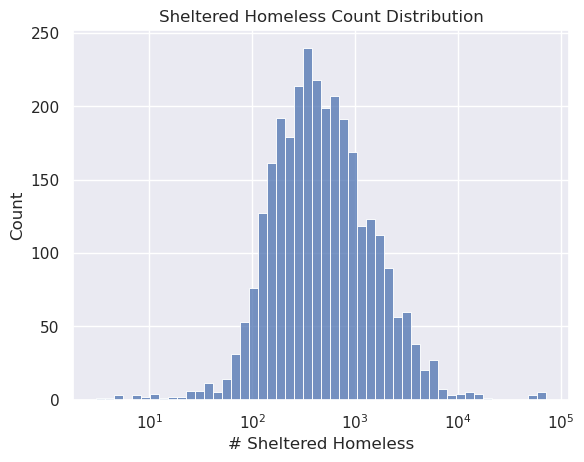

In [500]:
print("# of CoCs with 10,000+ sheltered homeless:",sum(df["pit_tot_shelt_pit_hud"] > 10000))
sns.histplot(data=df, x="pit_tot_shelt_pit_hud", log_scale=True)
plt.title("Sheltered Homeless Count Distribution")
plt.xlabel("# Sheltered Homeless")
plt.show()

# of CoCs with 10,000+ unsheltered homeless: 10
# zeros: 43


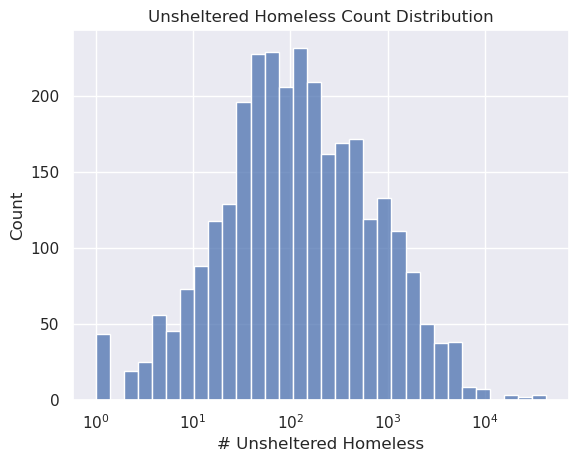

In [501]:
print("# of CoCs with 10,000+ unsheltered homeless:",sum(df["pit_tot_unshelt_pit_hud"] > 10000))
print("# zeros:", (df["pit_tot_unshelt_pit_hud"] == 0).sum())
fake_df = df["pit_tot_unshelt_pit_hud"] + 1
sns.histplot(data=fake_df, log_scale=True)
plt.title("Unsheltered Homeless Count Distribution")
plt.xlabel("# Unsheltered Homeless")
plt.show()

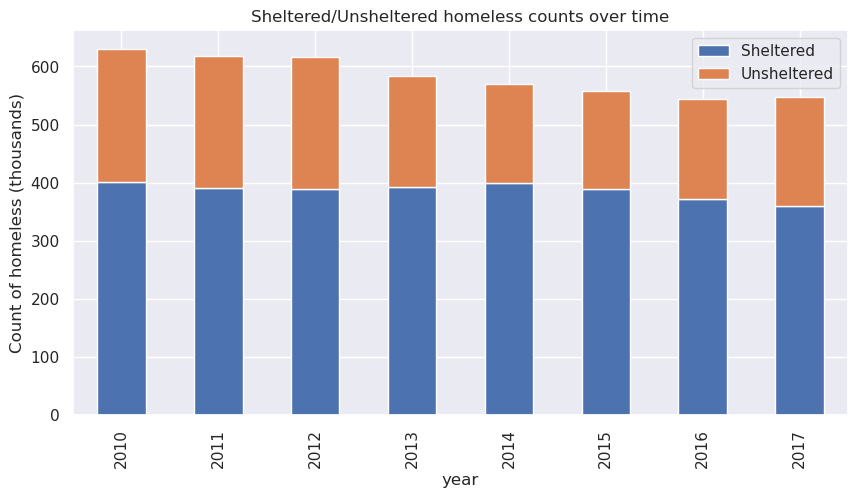

In [502]:
# stacked histogram with sheltered/unsheltered homeless per year
total_counts_per_year = df.loc[:,["pit_tot_shelt_pit_hud","pit_tot_unshelt_pit_hud","year"]].groupby(["year"]).sum()
total_counts_per_year.loc[:,["pit_tot_shelt_pit_hud","pit_tot_unshelt_pit_hud"]] /= 1000
fig, ax = plt.subplots(figsize=(10,5))
total_counts_per_year.plot(ax=ax, kind='bar', stacked=True, legend=False)
plt.legend(loc='upper right', labels=['Sheltered', 'Unsheltered'])
plt.title("Sheltered/Unsheltered homeless counts over time")
plt.ylabel("Count of homeless (thousands)")
plt.show()

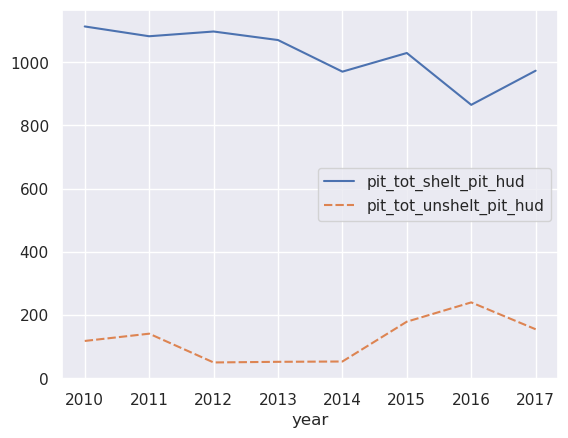

In [503]:
ak500 = df[df["cocnumber"] == "AK-500"].loc[:,["year", "pit_tot_shelt_pit_hud", "pit_tot_unshelt_pit_hud"]].set_index("year")
sns.lineplot(data=ak500)
plt.show()

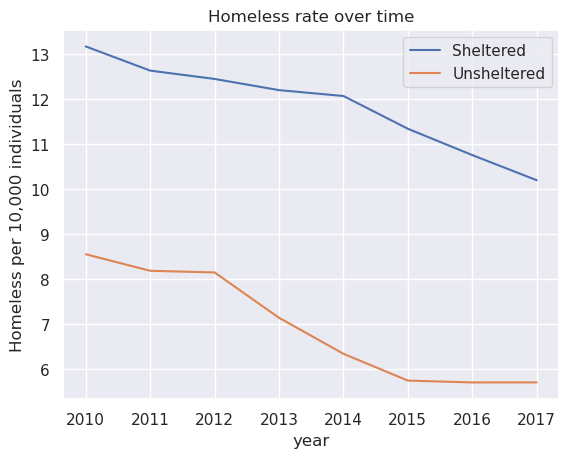

In [504]:
df["shelt_per_10k"] = (df["pit_tot_shelt_pit_hud"] / df["dem_pop_pop_census"]) * 10000
df["unshelt_per_10k"] = (df["pit_tot_unshelt_pit_hud"] / df["dem_pop_pop_census"]) * 10000
df["all_per_10k"] = (df["pit_tot_hless_pit_hud"] / df["dem_pop_pop_census"]) * 10000
per_year = df.loc[:,["shelt_per_10k","unshelt_per_10k","year"]].groupby(["year"], as_index=False).mean()
sns.lineplot(data=per_year,x="year", y="shelt_per_10k", label="Sheltered")
sns.lineplot(data=per_year,x="year", y="unshelt_per_10k", label="Unsheltered")
plt.title("Homeless rate over time")
plt.ylabel("Homeless per 10,000 individuals")
plt.show()

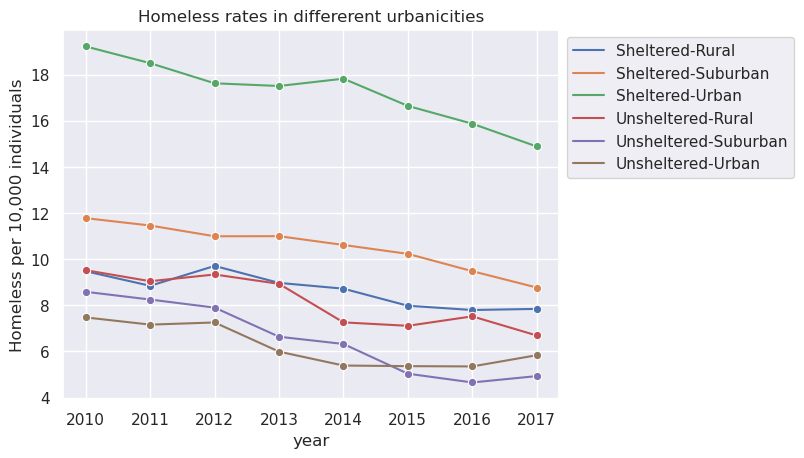

In [505]:
import matplotlib.patches as mpatches
# rural vs. urban rates over time
df["urbanicity"] = np.where(df["major_city"] == 1, 2, np.where(df["suburban"] == 1, 1,0))
ratio_by_urbanicity = df.loc[:,["shelt_per_10k", "unshelt_per_10k", "urbanicity", "year"]].groupby(["year", "urbanicity"], as_index=False).mean()
ratio_by_urbanicity = pd.melt(ratio_by_urbanicity, ["year","urbanicity"])
ratio_by_urbanicity["variable"] = ratio_by_urbanicity["variable"] + "-" + ratio_by_urbanicity["urbanicity"].astype(str)
ratio_by_urbanicity.drop(["urbanicity"], axis=1)
# sns.color_palette("hls", 6)
ax = sns.lineplot(data=ratio_by_urbanicity, x="year", y="value", hue="variable", marker="o")
legend_handles, _= ax.get_legend_handles_labels()
plt.legend(handles=legend_handles,labels=['Sheltered-Rural', 'Sheltered-Suburban', 'Sheltered-Urban', 'Unsheltered-Rural', 'Unsheltered-Suburban', 'Unsheltered-Urban'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Homeless rates in differerent urbanicities")
plt.ylabel("Homeless per 10,000 individuals")
plt.show()
fig.savefig("hmless_diff_urbanicities_over_time.png") 

### Homeless Rates by state
This [tutorial](https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6) was very helpful.

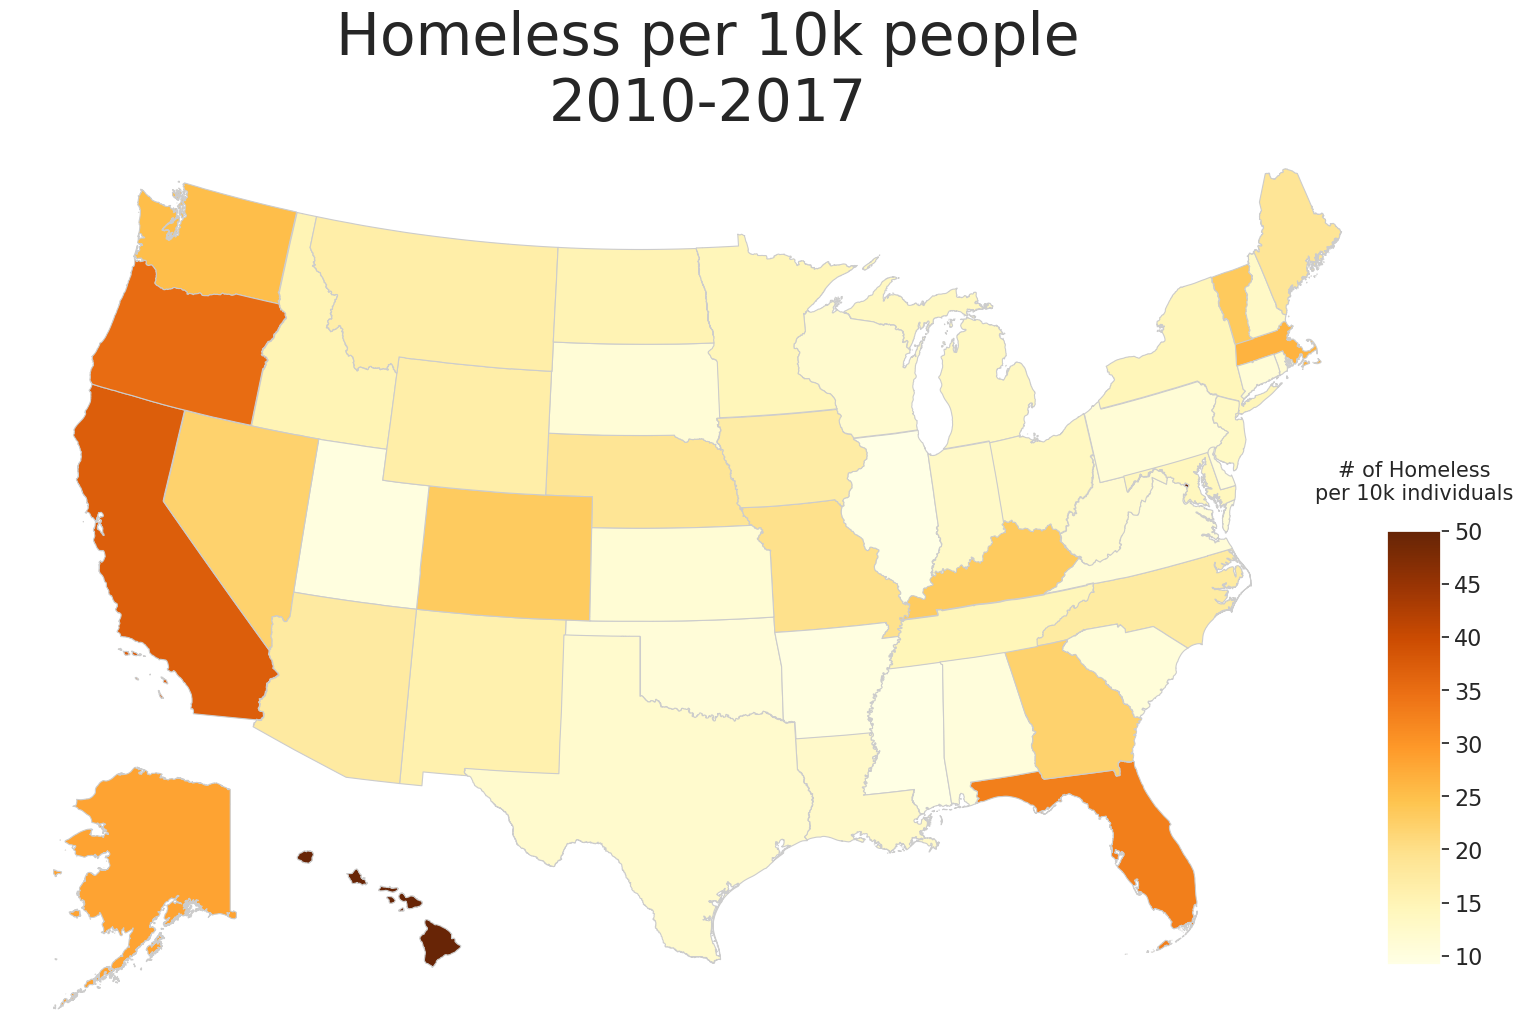

In [506]:
import geopandas as gpd
import matplotlib.colors as mcolors
from shapely.geometry import Polygon
from matplotlib.ticker import FuncFormatter

df["state"] = df["cocnumber"].str[:2]

state_rates = df.loc[:,["state", "all_per_10k"]].groupby("state").mean()
gdf = gpd.read_file('data/us_states')
gdf = gdf.merge(state_rates,left_on='STUSPS',right_on='state')

variable = 'all_per_10k'

def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf.all_per_10k.min(), 50 # District of Columbia has 112/10k which skews the colorscale, but the next highest is 50
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "YlOrBr"
gdf = makeColorColumn(gdf,variable,vmin,vmax)

visframe = gdf.to_crs('epsg:2163')

fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# add a title and annotation
ax.set_title('Homeless per 10k people\n2010-2017', fontdict={'fontsize': '42', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('# of Homeless\nper 10k individuals\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
# comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
fig.colorbar(sm, cax=cbax)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)

# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.STUSPS not in ['AK','HI']:
        vf = visframe[visframe.STUSPS==row.STUSPS]
        c = gdf[gdf.STUSPS==row.STUSPS][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')

# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf.STUSPS=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')

# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')
fig.savefig("states_heatmap.png") 
plt.show()

## Correlations
- Housing Market Conditions
- Economic Conditions (income)
- Local Policy and Safety Net
- Demographic of population
- Climate

In [507]:
corr_matrix = df.corr(numeric_only=True)
# print(corr_matrix[corr_matrix["all_per_10k"] > 0.05]["all_per_10k"])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(corr_matrix[corr_matrix["all_per_10k"] > 0.05]["all_per_10k"])

pit_tot_shelt_pit_hud               0.237273
pit_tot_unshelt_pit_hud             0.299069
pit_tot_hless_pit_hud               0.310352
pit_ind_shelt_pit_hud               0.256645
pit_ind_unshelt_pit_hud             0.267569
pit_ind_hless_pit_hud               0.308624
pit_perfam_shelt_pit_hud            0.218516
pit_perfam_unshelt_pit_hud          0.298748
pit_perfam_hless_pit_hud            0.260499
pit_ind_chronic_hless_pit_hud       0.303314
pit_perfam_chronic_hless_pit_hud    0.331330
pit_vet_hless_pit_hud               0.263696
econ_urb_urbanicity                 0.168707
coctag                              0.059976
hou_pol_totalind_hud                0.311837
hou_pol_totalday_hud                0.311966
hou_pol_totalexit_hud               0.283241
hou_pol_numret6mos_hud              0.247422
hou_pol_numret12mos_hud             0.257451
hou_pol_fedfundcoc                  0.194876
hou_pol_fund_project                0.137394
hou_pol_bed_es_hic_hud              0.200522
hou_pol_be

<Axes: xlabel='urbanicity', ylabel='all_per_10k'>

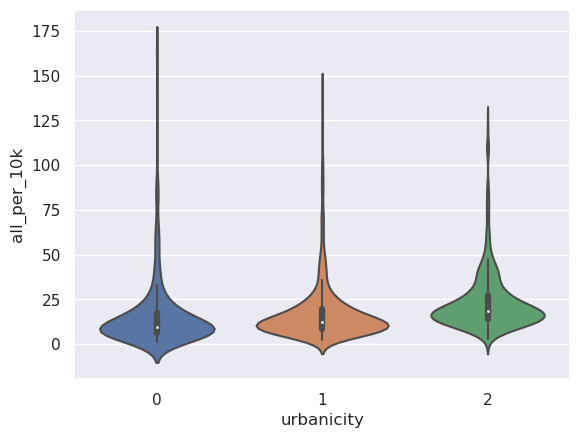

In [508]:
sns.violinplot(data=df, x="urbanicity", y="all_per_10k")
# sns.boxplot(data=df, x="urbanicity", y="all_per_10k")

### Housing Market Conditions

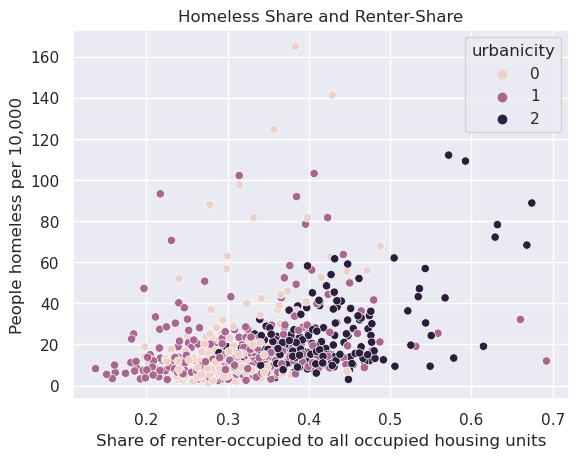

In [509]:
# hou_mkt_rentshare_acs5yr - share of renter-occupied housing units to all occupied housing units
sns.scatterplot(data=df,x="hou_mkt_rentshare_acs5yr",y="all_per_10k", hue="urbanicity")
plt.xlabel("Share of renter-occupied to all occupied housing units")
plt.ylabel("People homeless per 10,000")
plt.title("Homeless Share and Renter-Share")
plt.show()

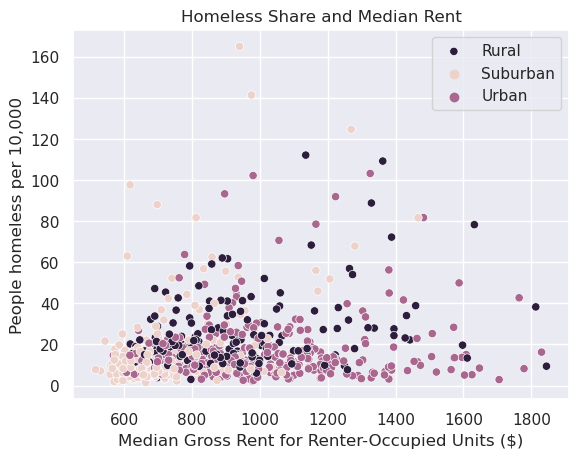

In [510]:
# hou_mkt_medrentgross_acs5yr - median gross rent for renter-occupied housing units
sns.scatterplot(data=df,x="hou_mkt_medrentgross_acs5yr", y="all_per_10k", hue="urbanicity")
plt.xlabel("Median Gross Rent for Renter-Occupied Units ($)")
plt.ylabel("People homeless per 10,000")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.title("Homeless Share and Median Rent")
plt.show()

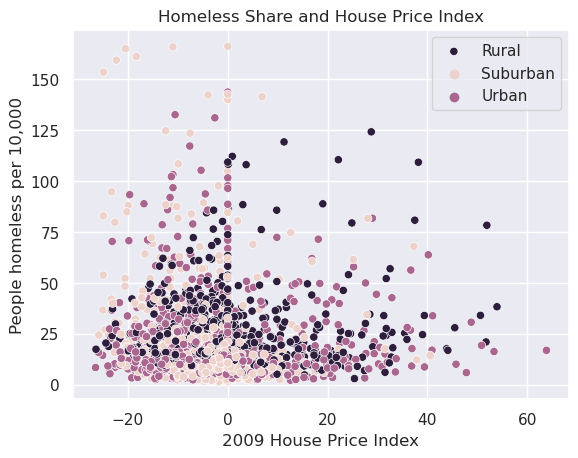

In [511]:
# fhfa_hpi_2009 - 2009 base year house price index (HPI), from FHFA
sns.scatterplot(data=df,x="fhfa_hpi_2009",y="all_per_10k", hue="urbanicity")
plt.xlabel("2009 House Price Index")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.ylabel("People homeless per 10,000")
plt.title("Homeless Share and House Price Index")
plt.show()

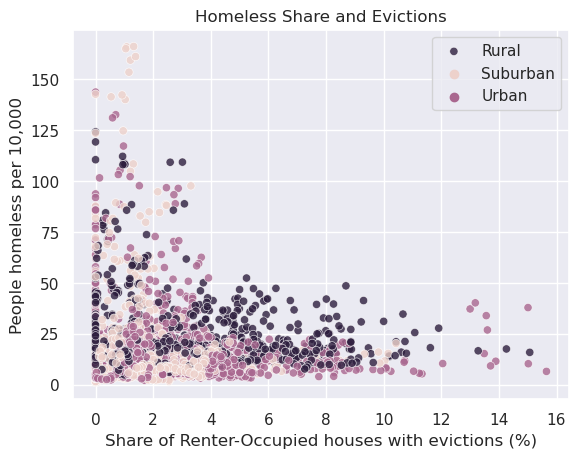

In [512]:
# hou_mkt_evict_rate - share of renter evictions
sns.scatterplot(data=df,x="hou_mkt_evict_rate",y="all_per_10k", hue="urbanicity", alpha=0.8)
plt.xlabel("Share of Renter-Occupied houses with evictions (%)")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.ylabel("People homeless per 10,000")
plt.title("Homeless Share and Evictions")
plt.show()

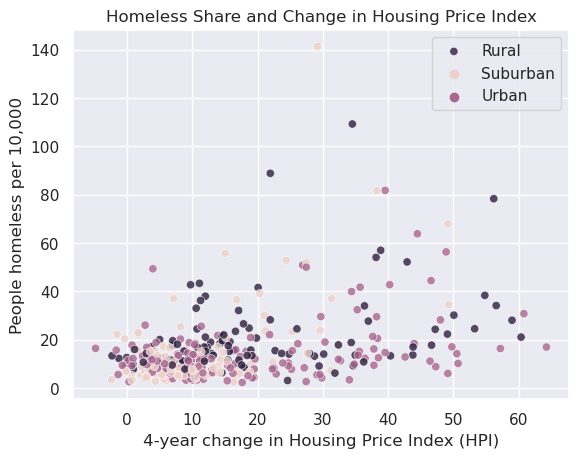

In [513]:
# d_fhfa_hpi_2009 - 4-year change in fhfa_hpi_2009 values (2017 and 2013)
sns.scatterplot(data=df,x="d_fhfa_hpi_2009",y="all_per_10k", alpha=0.8, hue="urbanicity")
plt.xlabel("4-year change in Housing Price Index (HPI)")
plt.ylabel("People homeless per 10,000")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.title("Homeless Share and Change in Housing Price Index")
fig.savefig("hmless_and_hpi.png") 
plt.show()

### Economic Conditions

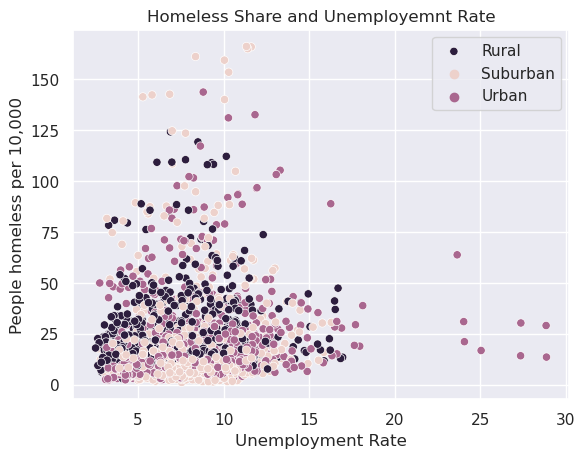

In [514]:
# econ_labor_unemp_rate_BLS - unemployment rate
sns.scatterplot(data=df,x="econ_labor_unemp_rate_BLS", y="all_per_10k", hue="urbanicity")
plt.xlabel("Unemployment Rate")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.ylabel("People homeless per 10,000")
plt.title("Homeless Share and Unemployemnt Rate")
plt.show()

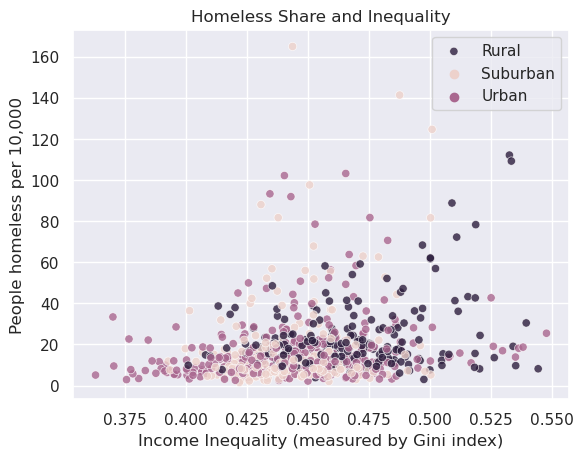

In [515]:
# econ_labor_incineq_acs5yr - gini coefficent between households
sns.scatterplot(data=df,x="econ_labor_incineq_acs5yr",y="all_per_10k", hue="urbanicity", alpha=0.8)
plt.xlabel("Income Inequality (measured by Gini index)")
plt.ylabel("People homeless per 10,000")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.title("Homeless Share and Inequality")
fig.savefig("hmless_and_inequality.png") 
plt.show()

### Local Policy / Safety Net

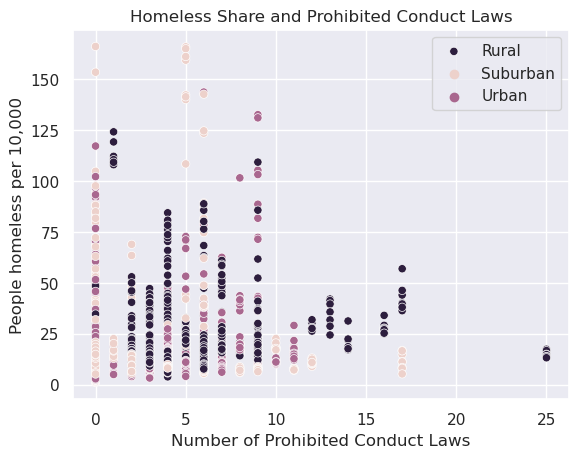

In [516]:
# hou_pol_hlessconduct_total - total number of prohibited conduct laws
sns.scatterplot(data=df,x="hou_pol_hlessconduct_total",y="all_per_10k", hue="urbanicity")
plt.xlabel("Number of Prohibited Conduct Laws")
plt.ylabel("People homeless per 10,000")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.title("Homeless Share and Prohibited Conduct Laws")
plt.show()

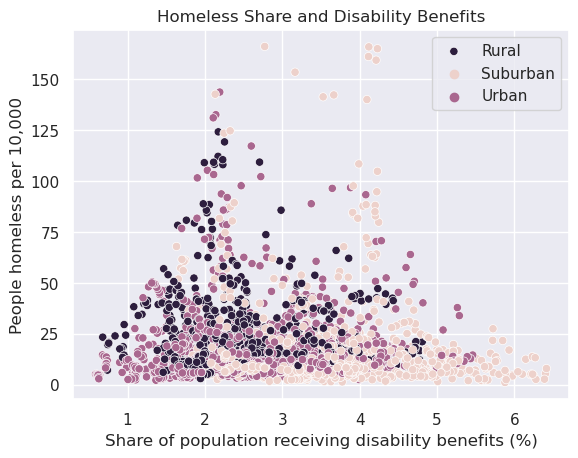

In [517]:
# econ_sn_ssdi_part_rate_SSA - share of population receiving disability benefits
sns.scatterplot(data=df,x="econ_sn_ssdi_part_rate_SSA",y="all_per_10k", hue="urbanicity")
plt.xlabel("Share of population receiving disability benefits (%)")
plt.ylabel("People homeless per 10,000")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.title("Homeless Share and Disability Benefits")
plt.show()

### Demographics

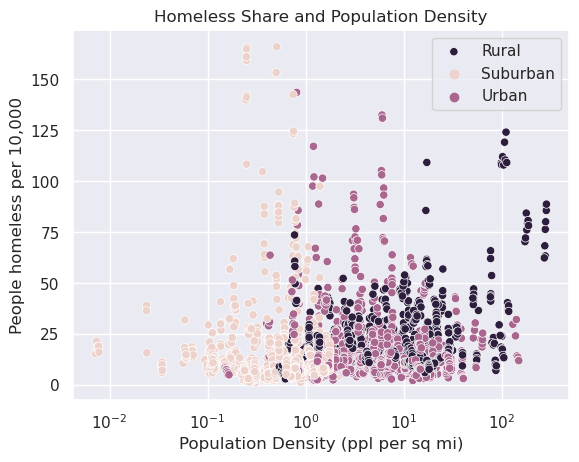

In [518]:
# dem_pop_density_census - population density
sns.scatterplot(data=df,x="dem_pop_density_census", y="all_per_10k", hue="urbanicity")
plt.xscale("log")
plt.xlabel("Population Density (ppl per sq mi)")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.ylabel("People homeless per 10,000")
plt.title("Homeless Share and Population Density")
plt.show()

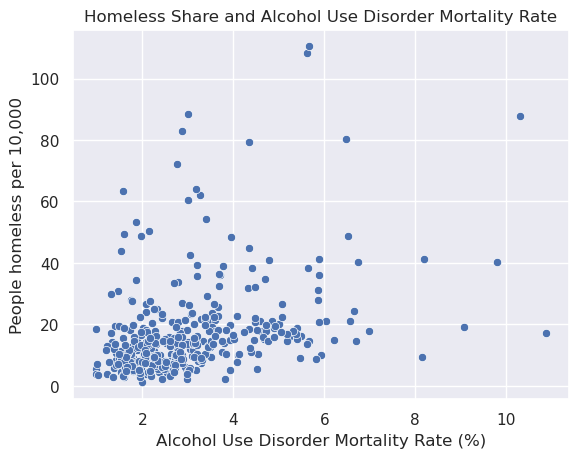

In [519]:
# dem_health_alcoholdeath_IMHE - 2014 mortality rate of alcohol use disorders, per 100,000 population, from IMHE
sns.scatterplot(data=df,x="dem_health_alcoholdeath_IMHE", y="all_per_10k")
plt.xlabel("Alcohol Use Disorder Mortality Rate (%)")
plt.ylabel("People homeless per 10,000")
# plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.title("Homeless Share and Alcohol Use Disorder Mortality Rate")
fig.savefig("hmless_and_aud.png") 
plt.show()

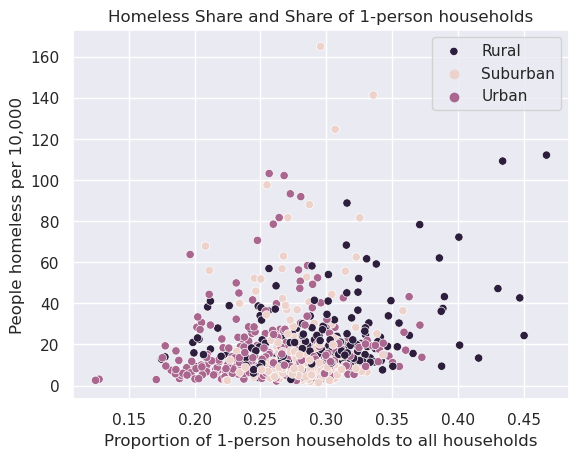

In [520]:
# dem_soc_singadult_acs5yr - proportion of 1-person households to all households
sns.scatterplot(data=df,x="dem_soc_singadult_acs5yr", y="all_per_10k", hue="urbanicity")
plt.xlabel("Proportion of 1-person households to all households")
plt.ylabel("People homeless per 10,000")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.title("Homeless Share and Share of 1-person households")
plt.show()

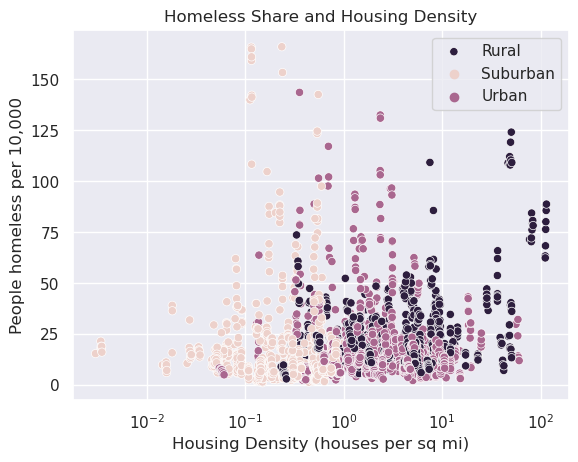

In [521]:
# hou_mkt_density_census - housing density
sns.scatterplot(data=df,x="hou_mkt_density_census", y="all_per_10k", hue="urbanicity")
plt.xscale("log")
plt.legend(labels=["Rural", "Suburban", "Urban"])
plt.xlabel("Housing Density (houses per sq mi)")
plt.ylabel("People homeless per 10,000")
plt.title("Homeless Share and Housing Density")
plt.show()

### Climate

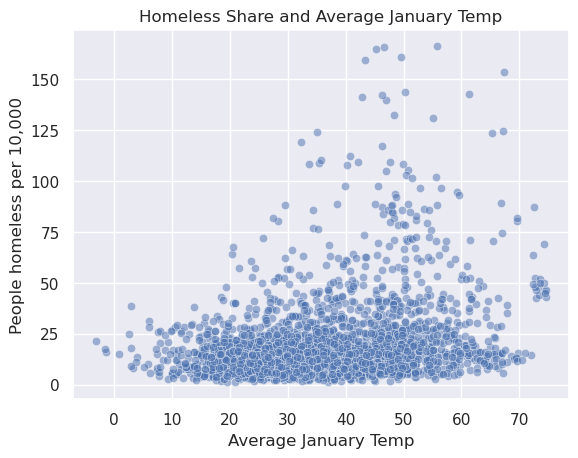

In [522]:
# env_wea_avgtemp_noaa - average January temperature
sns.scatterplot(data=df,x="env_wea_avgtemp_noaa", y="all_per_10k", alpha=0.5)
plt.xlabel("Average January Temp")
plt.ylabel("People homeless per 10,000")
plt.title("Homeless Share and Average January Temp")
plt.show()

## ML
**ML Question**: What will be the share of homeless per 10k people in a given community in the next year? (Regression problem using time-series data)


### Splitting
predict all_per_10k at time t+1
  
For each CoC:
 1. Store the y (all_per_10k) for all 8 years
 2. Shift that coc's data to create time-lagged features (# controlled by num_lags)
 3. Concat all CoCs back together for X and y

Split data so that communities (CoCs) are separated between train/test/val sets so that the model is tested on communities it hasn't seen before.

In [523]:
df = df.drop(["urbanicity", "econ_urb_urbanicity", "urban_cat", "coctag", "panelvar", "state"], axis=1)

CoCs = df["cocnumber"].unique()
Xs = []
ys = []
num_lags = 3
for CoC in CoCs:
    coc_df = df[df["cocnumber"] == CoC]
    coc_y = coc_df['all_per_10k']
    lags = []
    for i in range(1, num_lags + 1):
        lag = coc_df.shift(i)
        lag.columns = "t-" + str(i) + "_" + lag.columns
        lags.append(lag)
    coc_X = pd.concat(lags, axis=1)
    Xs.append(coc_X.iloc[num_lags:]) # we'll only predict for the years when we have data going far enough back
    ys.append(coc_y.iloc[num_lags:])
    # print("finished "+CoC)

X = pd.concat(Xs, axis=0)
y = pd.concat(ys, axis=0)
print(X.shape, y.shape)
print(X.loc[:, ["t-1_cocnumber", "t-2_cocnumber", "t-3_cocnumber"]].head(15)) # time-lagged cocnumbers either match or are None ✓ 
print(X.loc[:, ["t-1_year", "t-2_year", "t-3_year"]].head(15)) # time-lagged years are in correct order ✓

# drop year and cocnumber
groups = X["t-1_cocnumber"].reset_index(drop=True)
X = X.drop(["t-1_cocnumber", "t-2_cocnumber", "t-3_cocnumber","t-1_year", "t-2_year", "t-3_year"], axis=1)

(1880, 990) (1880,)
   t-1_cocnumber t-2_cocnumber t-3_cocnumber
3         AK-500        AK-500        AK-500
4         AK-500        AK-500        AK-500
5         AK-500        AK-500        AK-500
6         AK-500        AK-500        AK-500
7         AK-500        AK-500        AK-500
11        AK-501        AK-501        AK-501
12        AK-501        AK-501        AK-501
13        AK-501        AK-501        AK-501
14        AK-501        AK-501        AK-501
15        AK-501        AK-501        AK-501
19        AL-500        AL-500        AL-500
20        AL-500        AL-500        AL-500
21        AL-500        AL-500        AL-500
22        AL-500        AL-500        AL-500
23        AL-500        AL-500        AL-500
    t-1_year  t-2_year  t-3_year
3     2012.0    2011.0    2010.0
4     2013.0    2012.0    2011.0
5     2014.0    2013.0    2012.0
6     2015.0    2014.0    2013.0
7     2016.0    2015.0    2014.0
11    2012.0    2011.0    2010.0
12    2013.0    2012.0    201

In [524]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold

# create test set based on groups
splitter = GroupShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for i_other, i_test in splitter.split(X,y,groups):
    X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
    X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]
    
print(X_other.shape, y_other.shape)
print(X_test.shape, y_test.shape)
# print(groups_other.unique(), groups_test.unique())
overlap = [value for value in groups_other.unique() if value in groups_test.unique()]
print(len(overlap))

(1500, 984) (1500,)
(380, 984) (380,)
0


In [525]:
# kf = GroupKFold(n_splits=5)
# for train_index, val_index in kf.split(X_other, y_other, groups_other):
#     X_train, y_train, groups_train = X_other.iloc[train_index], y_other.iloc[train_index], groups_other.iloc[train_index]
#     X_val, y_val, groups_val = X_other.iloc[val_index], y_other.iloc[val_index], groups_other.iloc[val_index]
    
#     print(X_train.shape, y_train.shape)
#     print(X_val.shape, y_val.shape)
#     # print(groups_train.unique(), groups_val.unique())
#     overlap = [value for value in groups_train.unique() if value in groups_val.unique()]
#     print(len(overlap))

splitter = GroupShuffleSplit(n_splits=1, test_size=0.2/0.8, random_state=42)
for train_index, val_index in splitter.split(X_other,y_other,groups_other):
    X_train, y_train, groups_train = X_other.iloc[train_index], y_other.iloc[train_index], groups_other.iloc[train_index]
    X_val, y_val, groups_val = X_other.iloc[val_index], y_other.iloc[val_index], groups_other.iloc[val_index]
    
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
# print(groups_train.unique(), groups_val.unique())
overlap = [value for value in groups_train.unique() if value in groups_val.unique()]
print(len(overlap))

(1125, 984) (1125,)
(375, 984) (375,)
0


## Pre-processing

In [539]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

onehot_ftrs = ['state_abr']
std_ftrs = ['pit_tot_shelt_pit_hud', 'pit_tot_unshelt_pit_hud', 'pit_tot_hless_pit_hud', 'pit_ind_shelt_pit_hud', 'pit_ind_unshelt_pit_hud',
            'pit_ind_hless_pit_hud', 'pit_perfam_shelt_pit_hud', 'pit_perfam_unshelt_pit_hud', 'pit_perfam_hless_pit_hud', 'pit_ind_chronic_hless_pit_hud',
            'pit_perfam_chronic_hless_pit_hud', 'pit_vet_hless_pit_hud','hou_pol_totalind_hud', 'hou_pol_totalday_hud', 'hou_pol_totalexit_hud', 
            'hou_pol_numret6mos_hud', 'hou_pol_numret12mos_hud', 'hou_pol_fedfundcoc', 'hou_pol_fund_project', 'hou_pol_bed_es_hic_hud', 
            'hou_pol_bed_oph_hic_hud', 'hou_pol_bed_psh_hic_hud', 'hou_pol_bed_rrh_hic_hud', 'hou_pol_bed_sh_hic_hud', 'hou_pol_bed_th_hic_hud',
            'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'dem_pop_pop_census', 'dem_pop_male_census', 'dem_pop_female_census', 
            'dem_pop_child_census', 'dem_pop_adult_census', 'dem_pop_senior_census', 'dem_soc_white_census', 'dem_soc_black_census', 
            'dem_soc_native_census', 'dem_soc_asian_census', 'dem_soc_pacific_census', 'dem_soc_racetwo_census', 'dem_soc_hispanic_census',
           'total_rent_inventory_acs5yr', 'econ_labor_medinc_acs5yr', 'hou_mkt_homeval_acs5yr', 'hou_mkt_homeage_acs5yr', 'hou_mkt_homeage1940_acs5yr', 
            'hou_mkt_medrent_acs5yr', 'hou_mkt_medrentgross_acs5yr', 'hou_mkt_utility_acs5yr', 'fhfa_hpi_2009', 'econ_labor_force_pop_BLS', 
            'econ_labor_emp_pop_BLS','econ_labor_unemp_pop_BLS','hou_mkt_area_census', 'dem_pop_density_census', 'hou_mkt_density_census',
            'dem_pop_mig_census', 'hou_pol_hudunit_psh_hud','hou_mkt_units_census', 'hou_mkt_pmt_totbldg_census', 
            'hou_mkt_pmt_totunit_census', 'hou_mkt_pmt_totvalue_census','econ_labor_pov_pop_census', 'econ_labor_medinc_census', 'econ_sn_ssdi_SSA',
           'econ_sn_ssi_part_SSA', 'econ_sn_ssi_pay_SSA','hou_mkt_evict_count', 'hou_mkt_evict_file_count', 'hou_mkt_renter_count_evlab',
           'econ_sn_eitc_irs', 'econ_sn_returns_irs','dem_health_mentalhlth_chr','dem_health_cost_dart', 'hou_pol_hlessconduct_food', 
            'hou_pol_hlessconduct_total', 'hou_pol_hlessconduct_sleep', 'hou_pol_hlessconduct_loiter', 'hou_pol_hlessconduct_beg', 'cpi_2017',
            'env_wea_avgtemp_noaa', 'env_wea_precip_noaa', 'pit_miss', 'pit_hless_balance', 'pit_shelt_balance', 'pit_unshelt_balance', 'missing',
            'pit_shelt_pit_hud_share','dem_health_excesdrink_chr','econ_sn_eitc_irs_share', 'pit_unshelt_pit_hud_share', 'pit_hless_pit_hud_share', 'missing', 'dem_pop_adult_census_share', 
            'dem_pop_child_census_share', 'dem_pop_female_census_share', 'dem_pop_male_census_share', 'dem_pop_mig_census_share', 
            'dem_pop_senior_census_share', 'dem_age_boom_census_2011', 'dem_soc_asian_census_share', 'dem_soc_black_census_share', 
            'dem_soc_hispanic_census_share', 'dem_soc_native_census_share', 'dem_soc_pacific_census_share', 'dem_soc_racetwo_census_share', 
            'dem_soc_white_census_share','dem_soc_other_census_share', 'dem_health_mentalhlth_chr_share','dem_health_mhlth_chr_share_2017','dem_health_alcdeath_IMHE_2015',
            'dem_mort_lifeexp_IMHE_2015', 'dem_health_ins_acs5yr_2012', 'dem_health_ins_acs5yr_2017', 'dem_soc_ed_bach_acs5yr_2012', 
            'dem_soc_ed_bach_acs5yr_2017', 'dem_soc_ed_bach_acs5yr_diff', 'dem_soc_ed_somecoll_acs5yr_2012', 'dem_soc_ed_somecoll_acs5yr_2017', 
            'dem_soc_ed_hsgrad_acs5yr_2012', 'dem_soc_ed_hsgrad_acs5yr_2017', 'dem_soc_ed_lesshs_acs5yr_2012', 'dem_soc_ed_lesshs_acs5yr_2017', 
            'dem_soc_ed_lesshs_acs5yr_diff', 'dem_soc_singparent_acs5yr_2012', 'dem_soc_singparent_acs5yr_2017', 'dem_soc_singparent_acs5yr_diff',
            'dem_soc_singadult_acs5yr_2012', 'dem_soc_singadult_acs5yr_2017', 'dem_soc_singadult_acs5yr_diff', 'dem_soc_vet_acs5yr_2012',
            'dem_soc_vet_acs5yr_2017', 'dem_soc_vet_acs5yr_diff', 'econ_labor_incineq_acs5yr_2012', 'econ_labor_incineq_acs5yr_2017',
            'econ_labor_incineq_acs5yr_diff', 'econ_labor_topskill_acs5yr_2012', 'econ_labor_topskill_acs5yr_2017', 'econ_labor_topskill_acs5yr_diff',
            'econ_labor_midskill_acs5yr_2012', 'econ_labor_midskill_acs5yr_2017', 'econ_labor_midskill_acs5yr_diff', 'econ_labor_unskill_acs5yr_2012',
            'econ_labor_unskill_acs5yr_2017', 'econ_labor_unskill_acs5yr_diff', 'econ_labor_medinc_acs5yr_2012', 'econ_labor_medinc_acs5yr_2017',
            'econ_labor_pov_pop_census_share', 'econ_sn_cashasst_acs5yr_2012', 'econ_sn_cashasst_acs5yr_2017', 'econ_sn_cashasst_acs5yr_diff',
            'hou_mkt_rentshare_acs5yr_2012', 'hou_mkt_rentshare_acs5yr_2017', 'hou_mkt_rentshare_acs5yr_diff', 'hou_mkt_rentvacancy_acs5yr_2012', 
            'hou_mkt_rentvacancy_acs5yr_2017', 'hou_mkt_rentvacancy_acs5yr_diff', 'hou_mkt_ovrcrowd_acs5yr_2012', 'hou_mkt_ovrcrowd_acs5yr_2017',
            'hou_mkt_ovrcrowd_acs5yr_diff', 'hou_mkt_homeage_acs5yr_2012', 'hou_mkt_homeage_acs5yr_2017', 'hou_mkt_homeage_acs5yr_diff', 
            'hou_mkt_homeage1940_acs5yr_2012', 'hou_mkt_homeage1940_acs5yr_2017', 'hou_mkt_homeage1940_acs5yr_diff', 'hou_mkt_homeval_acs5yr_2012', 
            'hou_mkt_homeval_acs5yr_2017', 'hou_mkt_homeval_acs5yr_diff', 'hou_mkt_medrent_acs5yr_2012', 'hou_mkt_medrent_acs5yr_2017', 
            'hou_mkt_medrent_acs5yr_diff', 'hou_mkt_utility_acs5yr_2012', 'hou_mkt_utility_acs5yr_2017', 'hou_mkt_utility_acs5yr_diff', 
            'hou_mkt_burden_own_acs5yr_2012', 'hou_mkt_burden_own_acs5yr_2017', 'hou_mkt_burden_own_acs5yr_diff', 'hou_mkt_burden_sev_own_acs_2012', 
            'hou_mkt_burden_sev_own_acs_2017', 'hou_mkt_burden_sev_own_acs_diff', 'hou_mkt_burden_rent_acs5yr_2012', 'hou_mkt_burden_rent_acs5yr_2017', 
            'hou_mkt_burden_rent_acs5yr_diff', 'hou_mkt_burden_sev_rent_acs_2012', 'hou_mkt_burden_sev_rent_acs_2017', 'hou_mkt_burden_sev_rent_acs_diff',
            'hou_pol_hudunit_psh_hud_share', 'hou_mkt_pmt_unit_census_share','hou_mkt_homeval_xt', 'hou_mkt_burden_own_xt', 
            'hou_mkt_burden_sev_own_xt', 'hou_mkt_burden_rent_xt', 'hou_mkt_burden_sev_rent_xt', 'hou_mkt_homeage_xt', 'hou_mkt_homeage1940_xt',
            'hou_mkt_medrent_xt', 'hou_mkt_utility_xt', 'hou_mkt_rentshare_xt', 'hou_mkt_rentvacancy_xt', 'hou_mkt_ovrcrowd_xt', 
            'econ_labor_midskill_xt', 'econ_labor_incineq_xt', 'econ_sn_cashasst_xt', 'dem_soc_ed_bach_xt', 'dem_soc_ed_somecoll_xt', 
            'dem_soc_ed_hsgrad_xt', 'dem_soc_ed_lesshs_xt', 'dem_health_ins_xt', 'dem_soc_singadult_xt', 'dem_soc_singparent_xt', 'dem_soc_vet_xt', 
            'ln_hou_mkt_homeval_xt', 'ln_hou_mkt_medrent_xt', 'ln_econ_labor_medinc_census','d_pit_hless_pit_hud_share', 'd_pit_shelt_pit_hud_share', 
            'd_pit_unshelt_pit_hud_share', 'd_hou_mkt_homeval_xt', 'd_hou_mkt_burden_sev_rent_xt', 'd_hou_mkt_burden_own_xt', 
            'd_hou_mkt_burden_sev_own_xt', 'd_hou_mkt_burden_rent_xt', 'd_hou_mkt_medrent_xt', 'd_hou_mkt_utility_xt', 'd_fhfa_hpi_2009', 
            'd_hou_mkt_homeage1940_xt', 'd_hou_mkt_rentshare_xt', 'd_hou_mkt_rentvacancy_xt', 'd_hou_mkt_ovrcrowd_xt', 'd_hou_mkt_pctoverhouse_psh_hud',
            'd_hou_mkt_evict_rate', 'd_hou_pol_eli_psh_hud', 'd_hou_pol_hudunit_psh_hud_share', 'd_hou_pol_occhudunit_psh_hud', 'd_hou_pol_fedfundcoc',
            'd_econ_labor_medinc_census', 'd_econ_labor_unemp_rate_BLS', 'd_econ_labor_incineq_xt', 'd_econ_sn_cashasst_xt', 'd_econ_sn_eitc_irs_share',
            'd_econ_sn_ssdi_part_rate_SSA', 'd_econ_sn_ssi_part_rate_SSA','d_dem_soc_white_census_share', 'd_dem_soc_black_census_share', 
            'd_dem_soc_hispanic_census_share', 'd_dem_soc_asian_census_share', 'd_dem_pop_child_census_share', 'd_dem_pop_adult_census_share',
            'd_dem_pop_senior_census_share', 'd_dem_pop_female_census_share', 'd_dem_pop_mig_census_share', 'd_dem_soc_ed_bach_xt', 
            'd_dem_health_cost_dart', 'd_dem_soc_singadult_xt', 'd_dem_soc_singparent_xt', 'd_dem_soc_vet_xt', 'd_env_wea_avgtemp_noaa',
            'd_env_wea_avgtemp_summer_noaa', 'd_env_wea_precip_noaa', 'd_env_wea_precip_annual_noaa', 'dem_soc_ed_lessbach_xt',]

minmax_ftrs = ['hou_mkt_pplunit_psh_hud','dem_mort_lifeexp_IMHE','env_wea_avgtemp_summer_noaa', 'env_wea_precip_annual_noaa',
               'dem_pop_adult_census_share', 'dem_pop_child_census_share', 'dem_pop_female_census_share', 'dem_pop_male_census_share',
               'dem_pop_mig_census_share', 'dem_pop_senior_census_share', 'dem_age_boom_census_2011', 'dem_soc_asian_census_share',
               'dem_soc_black_census_share', 'dem_soc_hispanic_census_share', 'dem_soc_native_census_share', 'dem_soc_pacific_census_share',
               'dem_soc_racetwo_census_share', 'dem_soc_white_census_share','dem_health_excesdrink_chr_2017','census_region','census_division',
               'tight_high_cost_rental_mkt','hou_mkt_ovrcrowd_acs5yr', 'hou_mkt_rentshare_acs5yr', 'hou_mkt_rentvacancy_acs5yr','hou_mkt_evict_file_rate', 
               'hou_mkt_evict_rate','econ_sn_ssi_part_rate_SSA','econ_sn_ssdi_part_rate_SSA','hou_pol_eli_psh_hud','econ_labor_unemp_rate_BLS','hou_mkt_burden_own_acs5yr', 
               'hou_mkt_burden_sev_own_acs5yr', 'hou_mkt_burden_rent_acs5yr', 'hou_mkt_burden_sev_rent_acs5yr','hou_mkt_homeage1940_acs5yr','econ_labor_pov_acs5yr', 'dem_soc_singadult_acs5yr', 
               'econ_sn_cashasst_acs5yr','dem_soc_ed_bach_acs5yr', 'dem_soc_ed_hsgrad_acs5yr', 'dem_soc_ed_lesshs_acs5yr', 'dem_soc_ed_somecoll_acs5yr', 'dem_soc_vet_acs5yr', 
               'dem_soc_singparent_acs5yr','dem_health_ins_acs5yr', 'econ_labor_topskilled_acs5yr', 'econ_labor_midskilled_acs5yr', 'econ_labor_unskilled_acs5yr','dem_age_boom_census']

print(np.unique(std_ftrs, return_counts=True))
# def get_timelag_features(list):
#     return ['t-1_' + s for s in list] + ['t-2_' + s for s in list] + ['t-3_' + s for s in list]
    
# onehot_ftrs = get_timelag_features(onehot_ftrs)
# std_ftrs = get_timelag_features(std_ftrs)
# minmax_ftrs = get_timelag_features(minmax_ftrs)

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('minmax', MinMaxScaler(), minmax_ftrs),
#         ('std', StandardScaler(), std_ftrs),
#         ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs)
#     ])

# # np.seterr(invalid='ignore')
# clf = Pipeline(steps=[('preprocessor', preprocessor)])

# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)

(array(['cpi_2017', 'd_dem_health_cost_dart',
       'd_dem_pop_adult_census_share', 'd_dem_pop_child_census_share',
       'd_dem_pop_female_census_share', 'd_dem_pop_mig_census_share',
       'd_dem_pop_senior_census_share', 'd_dem_soc_asian_census_share',
       'd_dem_soc_black_census_share', 'd_dem_soc_ed_bach_xt',
       'd_dem_soc_hispanic_census_share', 'd_dem_soc_singadult_xt',
       'd_dem_soc_singparent_xt', 'd_dem_soc_vet_xt',
       'd_dem_soc_white_census_share', 'd_econ_labor_incineq_xt',
       'd_econ_labor_medinc_census', 'd_econ_labor_unemp_rate_BLS',
       'd_econ_sn_cashasst_xt', 'd_econ_sn_eitc_irs_share',
       'd_econ_sn_ssdi_part_rate_SSA', 'd_econ_sn_ssi_part_rate_SSA',
       'd_env_wea_avgtemp_noaa', 'd_env_wea_avgtemp_summer_noaa',
       'd_env_wea_precip_annual_noaa', 'd_env_wea_precip_noaa',
       'd_fhfa_hpi_2009', 'd_hou_mkt_burden_own_xt',
       'd_hou_mkt_burden_rent_xt', 'd_hou_mkt_burden_sev_own_xt',
       'd_hou_mkt_burden_sev_rent_xt', 'd_h

In [534]:
# ~(np.isnan(X_train_prep) | (X_train_prep <= 1))
df["dem_age_boom_census"]

0            NaN
1       0.294151
2            NaN
3            NaN
4            NaN
          ...   
3003         NaN
3004         NaN
3005         NaN
3006         NaN
3007         NaN
Name: dem_age_boom_census, Length: 3008, dtype: float64

In [533]:
text = input("paste:")
entries = text.split(" ")
print(entries)

paste: dem_soc_ed_bach_acs5yr dem_soc_ed_hsgrad_acs5yr dem_soc_ed_lesshs_acs5yr dem_soc_ed_somecoll_acs5yr dem_soc_vet_acs5yr dem_soc_singparent_acs5yr dem_health_ins_acs5yr econ_labor_topskilled_acs5yr econ_labor_midskilled_acs5yr econ_labor_unskilled_acs5yr


['dem_soc_ed_bach_acs5yr', 'dem_soc_ed_hsgrad_acs5yr', 'dem_soc_ed_lesshs_acs5yr', 'dem_soc_ed_somecoll_acs5yr', 'dem_soc_vet_acs5yr', 'dem_soc_singparent_acs5yr', 'dem_health_ins_acs5yr', 'econ_labor_topskilled_acs5yr', 'econ_labor_midskilled_acs5yr', 'econ_labor_unskilled_acs5yr']
